In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

In [3]:
from scipy import stats

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline
plt.style.use('ggplot')

In [10]:
data = randn(25)

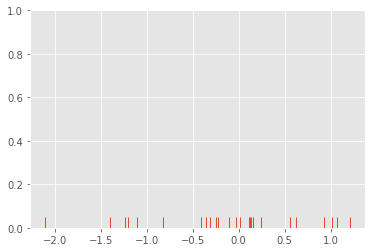

In [11]:
sns.rugplot(data)

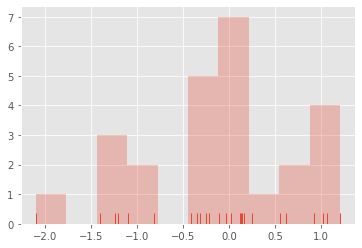

In [17]:
plt.hist(data,alpha=0.3)
sns.rugplot(data)

(0, 1)

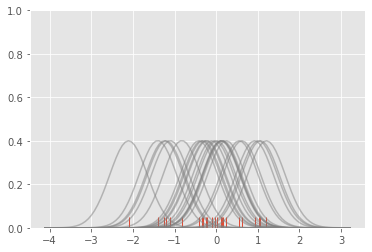

In [15]:
sns.rugplot(data)

x_min = data.min() - 2
x_max = data.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*data.std()**5) / (3*len(data)))**0.2

kernel_list = []

for data_point in data:
    #Create a kernel for each point and append it to kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)#$probability density fn
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel *0.4
    
    plt.plot(x_axis,kernel,color='grey', alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

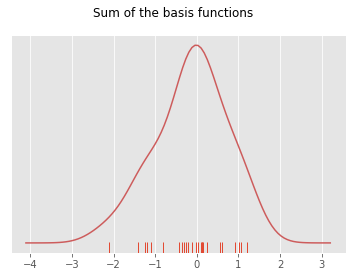

In [18]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(data)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

All the above could be done in very easy step:

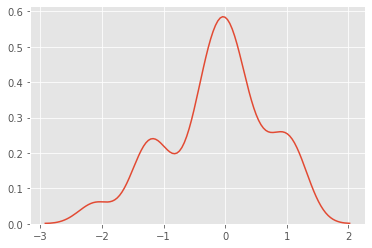

In [19]:
sns.kdeplot(data)

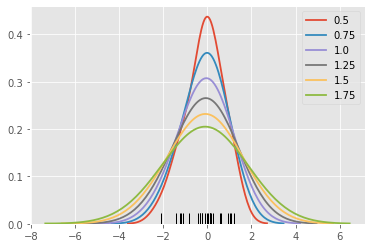

In [20]:
sns.rugplot(data, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(data,bw=bw,lw=1.8,label=bw)

Lets create some kernel options

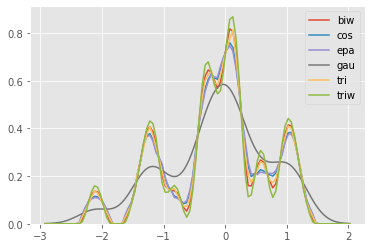

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(data,kernel=kern,label=kern)

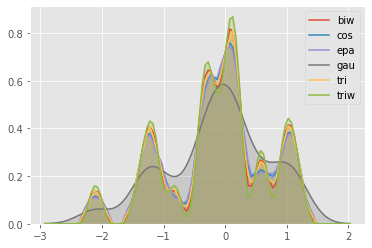

In [22]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(data,kernel=kern,label=kern,shade=True)

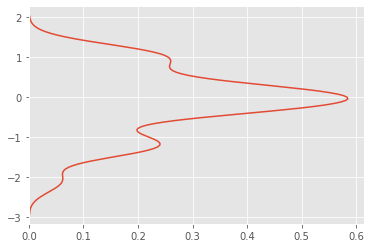

In [23]:
sns.kdeplot(data,vertical=True)

Also to create cucmulative distribution function

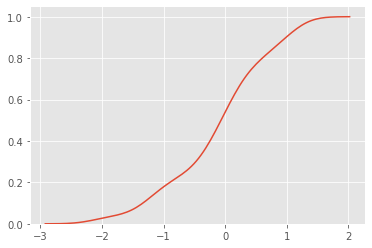

In [24]:
sns.kdeplot(data,cumulative=True)

For multidimentional data - multi variate function

C:\Users\SP\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


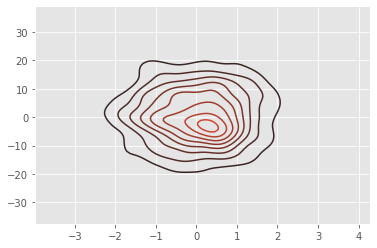

In [25]:
mean= [0,0]

cov = [[1,0],[0,100]]

data2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(data2,columns=['X','Y'])

sns.kdeplot(dframe)

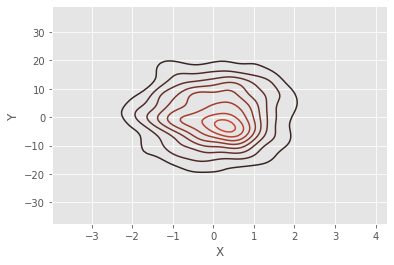

In [26]:
sns.kdeplot(dframe.X,dframe.Y)

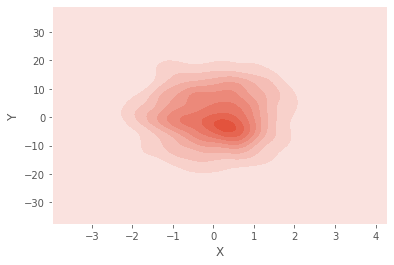

In [27]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

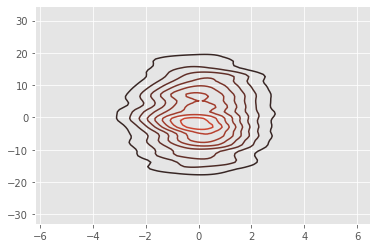

In [28]:
sns.kdeplot(dframe,bw=1)

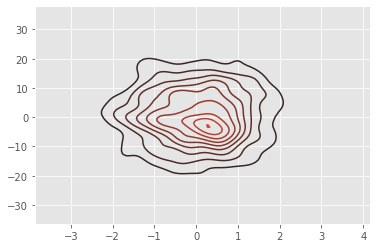

In [29]:
sns.kdeplot(dframe,bw='silverman')

kde jointplot

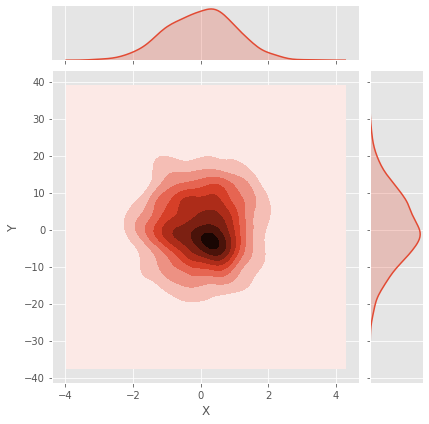

In [30]:
sns.jointplot('X','Y',dframe,kind='kde')